In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
all_eq = pd.read_excel('../mf/all-equity-excluding-sector-funds-2023.xlsx', skiprows=5, index_col=0)

In [105]:
all_eq

,Rating,Category,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,,,,,,,,,,,,,
360 ONE ELSS Tax Saver Nifty 50 Index Fund - Direct Plan,NaN,EQ-ELSS,0.27,2022-12-28,62.0,1.4,NaN,NaN,Very High,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360 ONE FlexiCap Fund - Direct Plan,NaN,EQ-FLX,0.90,2023-06-30,421.0,0.9,NaN,NaN,Very High,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360 ONE Focused Equity Fund - Direct Plan,4.0,EQ-FLX,0.63,2014-10-30,6794.0,4.5,Below Average,Above Average,Very High,12.82,...,NaN,3.09,10.66,31.72,-5.33,29.23,25.52,37.91,0.13,31.09
Aditya Birla Sun Life Bal Bhavishya Yojna - Direct Plan,1.0,EQ-FLX,0.70,2019-02-11,941.0,3.1,Above Average,Low,Very High,11.82,...,NaN,NaN,NaN,NaN,NaN,NaN,16.29,14.24,1.79,24.63
Aditya Birla Sun Life ELSS Tax Saver - Direct Plan,1.0,EQ-ELSS,0.95,2013-01-01,14976.0,2.3,High,Low,Very High,11.68,...,55.61,9.87,4.33,44.71,-3.47,5.37,16.33,13.64,-0.64,19.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WhiteOak Capital Large & Mid Cap Fund - Direct Plan,NaN,EQ-L&MC,0.45,2023-12-22,1058.0,0.4,NaN,NaN,Very High,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WhiteOak Capital Mid Cap Fund - Direct Plan,NaN,EQ-MC,0.54,2022-09-07,1658.0,1.7,NaN,NaN,Very High,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.99
WhiteOak Capital Multi Cap Fund - Direct Plan,NaN,EQ-MLC,0.63,2023-09-22,781.0,0.7,NaN,NaN,Very High,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
all_eq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 360 ONE ELSS Tax Saver Nifty 50 Index Fund - Direct Plan to Zerodha Nifty Large Midcap 250 Index Fund - Direct Plan
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rating                 251 non-null    float64       
 1   Category               470 non-null    object        
 2   Expense Ratio (%)      465 non-null    float64       
 3   Launch                 468 non-null    datetime64[ns]
 4   Net Assets (Cr)        466 non-null    float64       
 5   Fund Manager (Tenure)  470 non-null    float64       
 6   Fund Risk Grade        251 non-null    object        
 7   Fund Return Grade      251 non-null    object        
 8   Riskometer             470 non-null    object        
 9   Standard Deviation     313 non-null    float64       
 10  Sharpe Ratio           313 non-null    float64       
 11  Sortino Ratio        

# Data Exploration

Convert strings to numeric values

In [9]:
all_eq['Rating'] = all_eq['Rating'].apply(pd.to_numeric, errors='coerce')

In [10]:
all_eq.iloc[:, 2:3] = all_eq.iloc[:, 2:3].apply(pd.to_numeric, errors='coerce')

In [11]:
all_eq.iloc[:, 4:6] = all_eq.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce')

In [12]:
all_eq.iloc[:, 9:] = all_eq.iloc[:, 9:].apply(pd.to_numeric, errors='coerce')

In [5]:
all_eq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 360 ONE ELSS Tax Saver Nifty 50 Index Fund - Direct Plan to Zerodha Nifty Large Midcap 250 Index Fund - Direct Plan
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rating                 251 non-null    float64       
 1   Category               470 non-null    object        
 2   Expense Ratio (%)      465 non-null    float64       
 3   Launch                 468 non-null    datetime64[ns]
 4   Net Assets (Cr)        466 non-null    float64       
 5   Fund Manager (Tenure)  470 non-null    float64       
 6   Fund Risk Grade        251 non-null    object        
 7   Fund Return Grade      251 non-null    object        
 8   Riskometer             470 non-null    object        
 9   Standard Deviation     313 non-null    float64       
 10  Sharpe Ratio           313 non-null    float64       
 11  Sortino Ratio        

In [6]:
all_eq.describe()

,Rating,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,251.000000,465.000000,468,466.000000,470.000000,313.000000,313.000000,313.000000,313.000000,313.000000,...,185.000000,191.000000,212.000000,220.000000,234.000000,251.000000,283.000000,303.00000,345.000000,403.000000
mean,3.043825,0.571419,2017-07-31 21:44:36.923076864,5626.152361,2.969574,13.461310,1.179521,2.110927,0.928211,2.179457,...,52.065514,3.868325,5.501651,37.891591,-4.059658,8.626215,18.676007,35.98505,3.506870,31.406873
min,1.000000,0.030000,2001-12-28 00:00:00,1.000000,-0.100000,10.070000,0.340000,0.660000,0.620000,-9.200000,...,11.890000,-6.750000,-5.890000,5.260000,-28.630000,-23.240000,-7.980000,13.64000,-18.060000,17.980000
25%,2.000000,0.280000,2013-01-01 00:00:00,216.000000,1.100000,12.610000,0.980000,1.700000,0.880000,-1.130000,...,38.770000,-0.870000,3.182500,30.205000,-8.162500,4.560000,14.665000,25.87500,0.680000,24.840000
50%,3.000000,0.520000,2017-12-11 00:00:00,1076.000000,2.250000,12.900000,1.130000,2.060000,0.930000,1.580000,...,48.650000,3.470000,4.535000,37.865000,-3.865000,9.790000,16.530000,33.15000,4.020000,29.880000
75%,4.000000,0.790000,2022-02-10 00:00:00,5184.000000,3.900000,14.080000,1.380000,2.410000,0.990000,4.660000,...,59.850000,7.565000,8.182500,43.670000,1.505000,13.330000,21.270000,41.67000,5.720000,36.345000
max,5.000000,2.550000,2024-04-26 00:00:00,177047.000000,15.900000,21.130000,2.130000,4.270000,1.160000,20.610000,...,112.770000,22.290000,16.920000,80.440000,9.970000,29.230000,76.130000,91.73000,28.550000,63.340000
std,1.070547,0.395610,NaN,13259.280086,2.615720,1.589787,0.299333,0.515472,0.095696,4.083467,...,18.744352,5.933530,4.211849,9.378345,7.275770,6.544818,8.763428,12.76552,5.518184,9.015991


In [7]:
all_eq.isnull().sum()

Rating                   219
Category                   0
Expense Ratio (%)          5
Launch                     2
Net Assets (Cr)            4
Fund Manager (Tenure)      0
Fund Risk Grade          219
Fund Return Grade        219
Riskometer                 0
Standard Deviation       157
Sharpe Ratio             157
Sortino Ratio            157
Beta                     157
Alpha                    157
R-Squared                157
2014                     285
2015                     279
2016                     258
2017                     250
2018                     236
2019                     219
2020                     187
2021                     167
2022                     125
2023                      67
dtype: int64

In [12]:
all_eq['Fund Risk Grade'].value_counts()

Fund Risk Grade
Average          86
Above Average    67
Below Average    46
High             28
Low              24
Name: count, dtype: int64

In [10]:
all_eq.groupby('Fund Risk Grade').mean(numeric_only=True).sort_values(by='Rating')

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Fund Risk Grade,,,,,,,,,,,,,,,,,,,,
High,1.857143,0.841429,6033.178571,2.592857,15.875357,1.000000,1.676786,1.035714,0.003929,0.833214,56.227500,6.075625,5.513750,41.236250,-7.802353,2.488333,20.027273,36.908400,-1.040714,32.330357
Above Average,2.656716,0.697910,4504.134328,3.574627,13.710448,1.160000,2.077612,0.936119,1.778209,0.875970,52.885789,3.440500,5.955682,39.091818,-5.568723,7.496327,18.411786,37.165556,2.817015,31.480597
Average,3.093023,0.761860,8574.523256,3.980233,13.091744,1.200000,2.157093,0.902326,2.031047,0.893023,54.170690,4.707797,5.636557,39.151290,-4.792273,8.973562,19.038049,37.430235,3.345581,30.639070
Below Average,3.478261,0.710435,7721.282609,3.660870,12.558696,1.268913,2.302826,0.874565,3.250652,0.881739,49.829032,3.491250,5.900571,36.526571,-4.876111,10.528421,18.800476,35.880667,4.271522,30.718696
Low,4.500000,0.714583,15314.500000,5.075000,12.025833,1.535833,2.664167,0.809167,6.540417,0.833750,57.422353,5.723889,5.446667,38.367368,-4.675263,10.685789,19.966364,39.182174,7.119583,32.458333


In [15]:
all_eq['Fund Return Grade'].value_counts()

Fund Return Grade
Average          92
Above Average    63
Below Average    50
High             26
Low              20
Name: count, dtype: int64

In [17]:
all_eq.groupby('Fund Return Grade').mean(numeric_only=True).sort_values(by='Rating', ascending=True)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Fund Return Grade,,,,,,,,,,,,,,,,,,,,
Low,1.450000,0.945500,9499.500000,3.015000,13.496000,0.858000,1.510500,0.900500,-2.722000,0.866000,58.039286,6.383571,5.375000,41.042857,-4.578667,7.626875,19.619444,30.317895,-3.062500,28.269500
Below Average,2.240000,0.825600,4893.080000,3.154000,12.966000,1.073800,1.963000,0.892200,0.600000,0.880200,53.275625,3.952647,5.558108,38.428378,-4.265476,8.625349,17.428936,32.371837,1.739400,28.299600
Average,2.880435,0.715652,7041.717391,3.705435,13.234674,1.163370,2.098696,0.916413,1.431196,0.905326,53.409677,4.127302,5.350769,38.714242,-5.550147,9.225417,17.994096,36.148876,2.805543,30.449457
Above Average,3.809524,0.678254,8277.000000,4.252381,13.484286,1.352222,2.387619,0.916667,4.320317,0.857143,53.658000,3.652222,6.656000,37.732250,-5.411000,9.699778,20.610370,40.672333,4.362063,33.286825
High,4.538462,0.650385,12573.423077,4.530769,14.230769,1.580000,2.679615,0.934231,8.500385,0.798846,50.898824,6.226667,5.762222,39.670000,-6.667500,3.650000,21.949091,47.570000,9.847692,37.026154


In [18]:
all_eq.groupby('Category').count()

,Rating,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,Sharpe Ratio,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Category,,,,,,,,,,,,,,,,,,,,,
EQ-ELSS,33,42,42,42,42,33,33,42,36,36,...,27,27,31,32,33,33,36,36,36,38
EQ-FLX,57,83,84,83,84,57,57,84,59,59,...,32,34,37,38,40,44,52,57,65,72
EQ-L&MC,26,33,33,33,33,26,26,33,27,27,...,18,18,20,21,21,22,25,27,28,28
EQ-LC,63,163,164,164,165,63,63,165,105,105,...,57,58,67,71,79,85,96,102,118,146
EQ-MC,28,47,47,47,47,28,28,47,31,31,...,20,21,21,21,22,23,26,28,32,43
EQ-MLC,0,24,25,24,25,0,0,25,8,8,...,6,6,6,6,7,7,8,8,13,16
EQ-SC,25,41,41,41,42,25,25,42,25,25,...,11,13,13,13,14,17,20,24,27,31
EQ-VAL,19,32,32,32,32,19,19,32,22,22,...,14,14,17,18,18,20,20,21,26,29


<Axes: xlabel='Fund Return Grade', ylabel='count'>

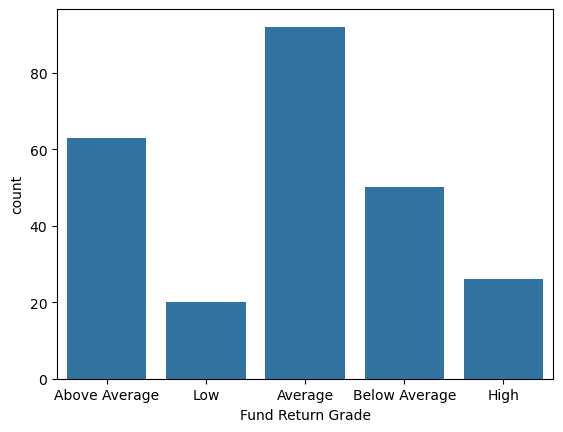

In [19]:
sns.countplot(data=all_eq, x='Fund Return Grade')

In [20]:
pd.crosstab(all_eq['Fund Return Grade'], all_eq['Fund Risk Grade'])

Fund Risk Grade,Above Average,Average,Below Average,High,Low
Fund Return Grade,,,,,
Above Average,11,20,13,7,12
Average,24,36,21,7,4
Below Average,18,20,7,4,1
High,9,6,3,2,6
Low,5,4,2,8,1


<Axes: xlabel='Fund Return Grade', ylabel='Fund Risk Grade'>

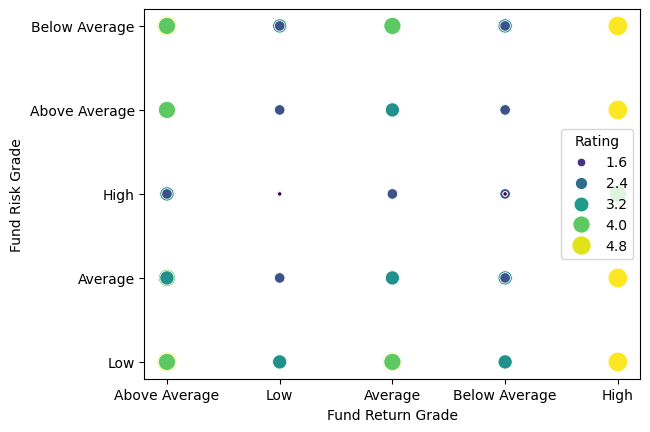

In [21]:
sns.scatterplot(data=all_eq, x='Fund Return Grade', y='Fund Risk Grade', hue='Rating', size='Rating', 
                sizes=(10, 200), palette='viridis', legend='brief')

In [22]:
num_columns = all_eq.select_dtypes('number').columns.to_list()

In [23]:
num_columns

['Rating',
 'Expense Ratio (%)',
 'Net Assets (Cr)',
 'Fund Manager (Tenure)',
 'Standard Deviation',
 'Sharpe Ratio',
 'Sortino Ratio',
 'Beta',
 'Alpha',
 'R-Squared',
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

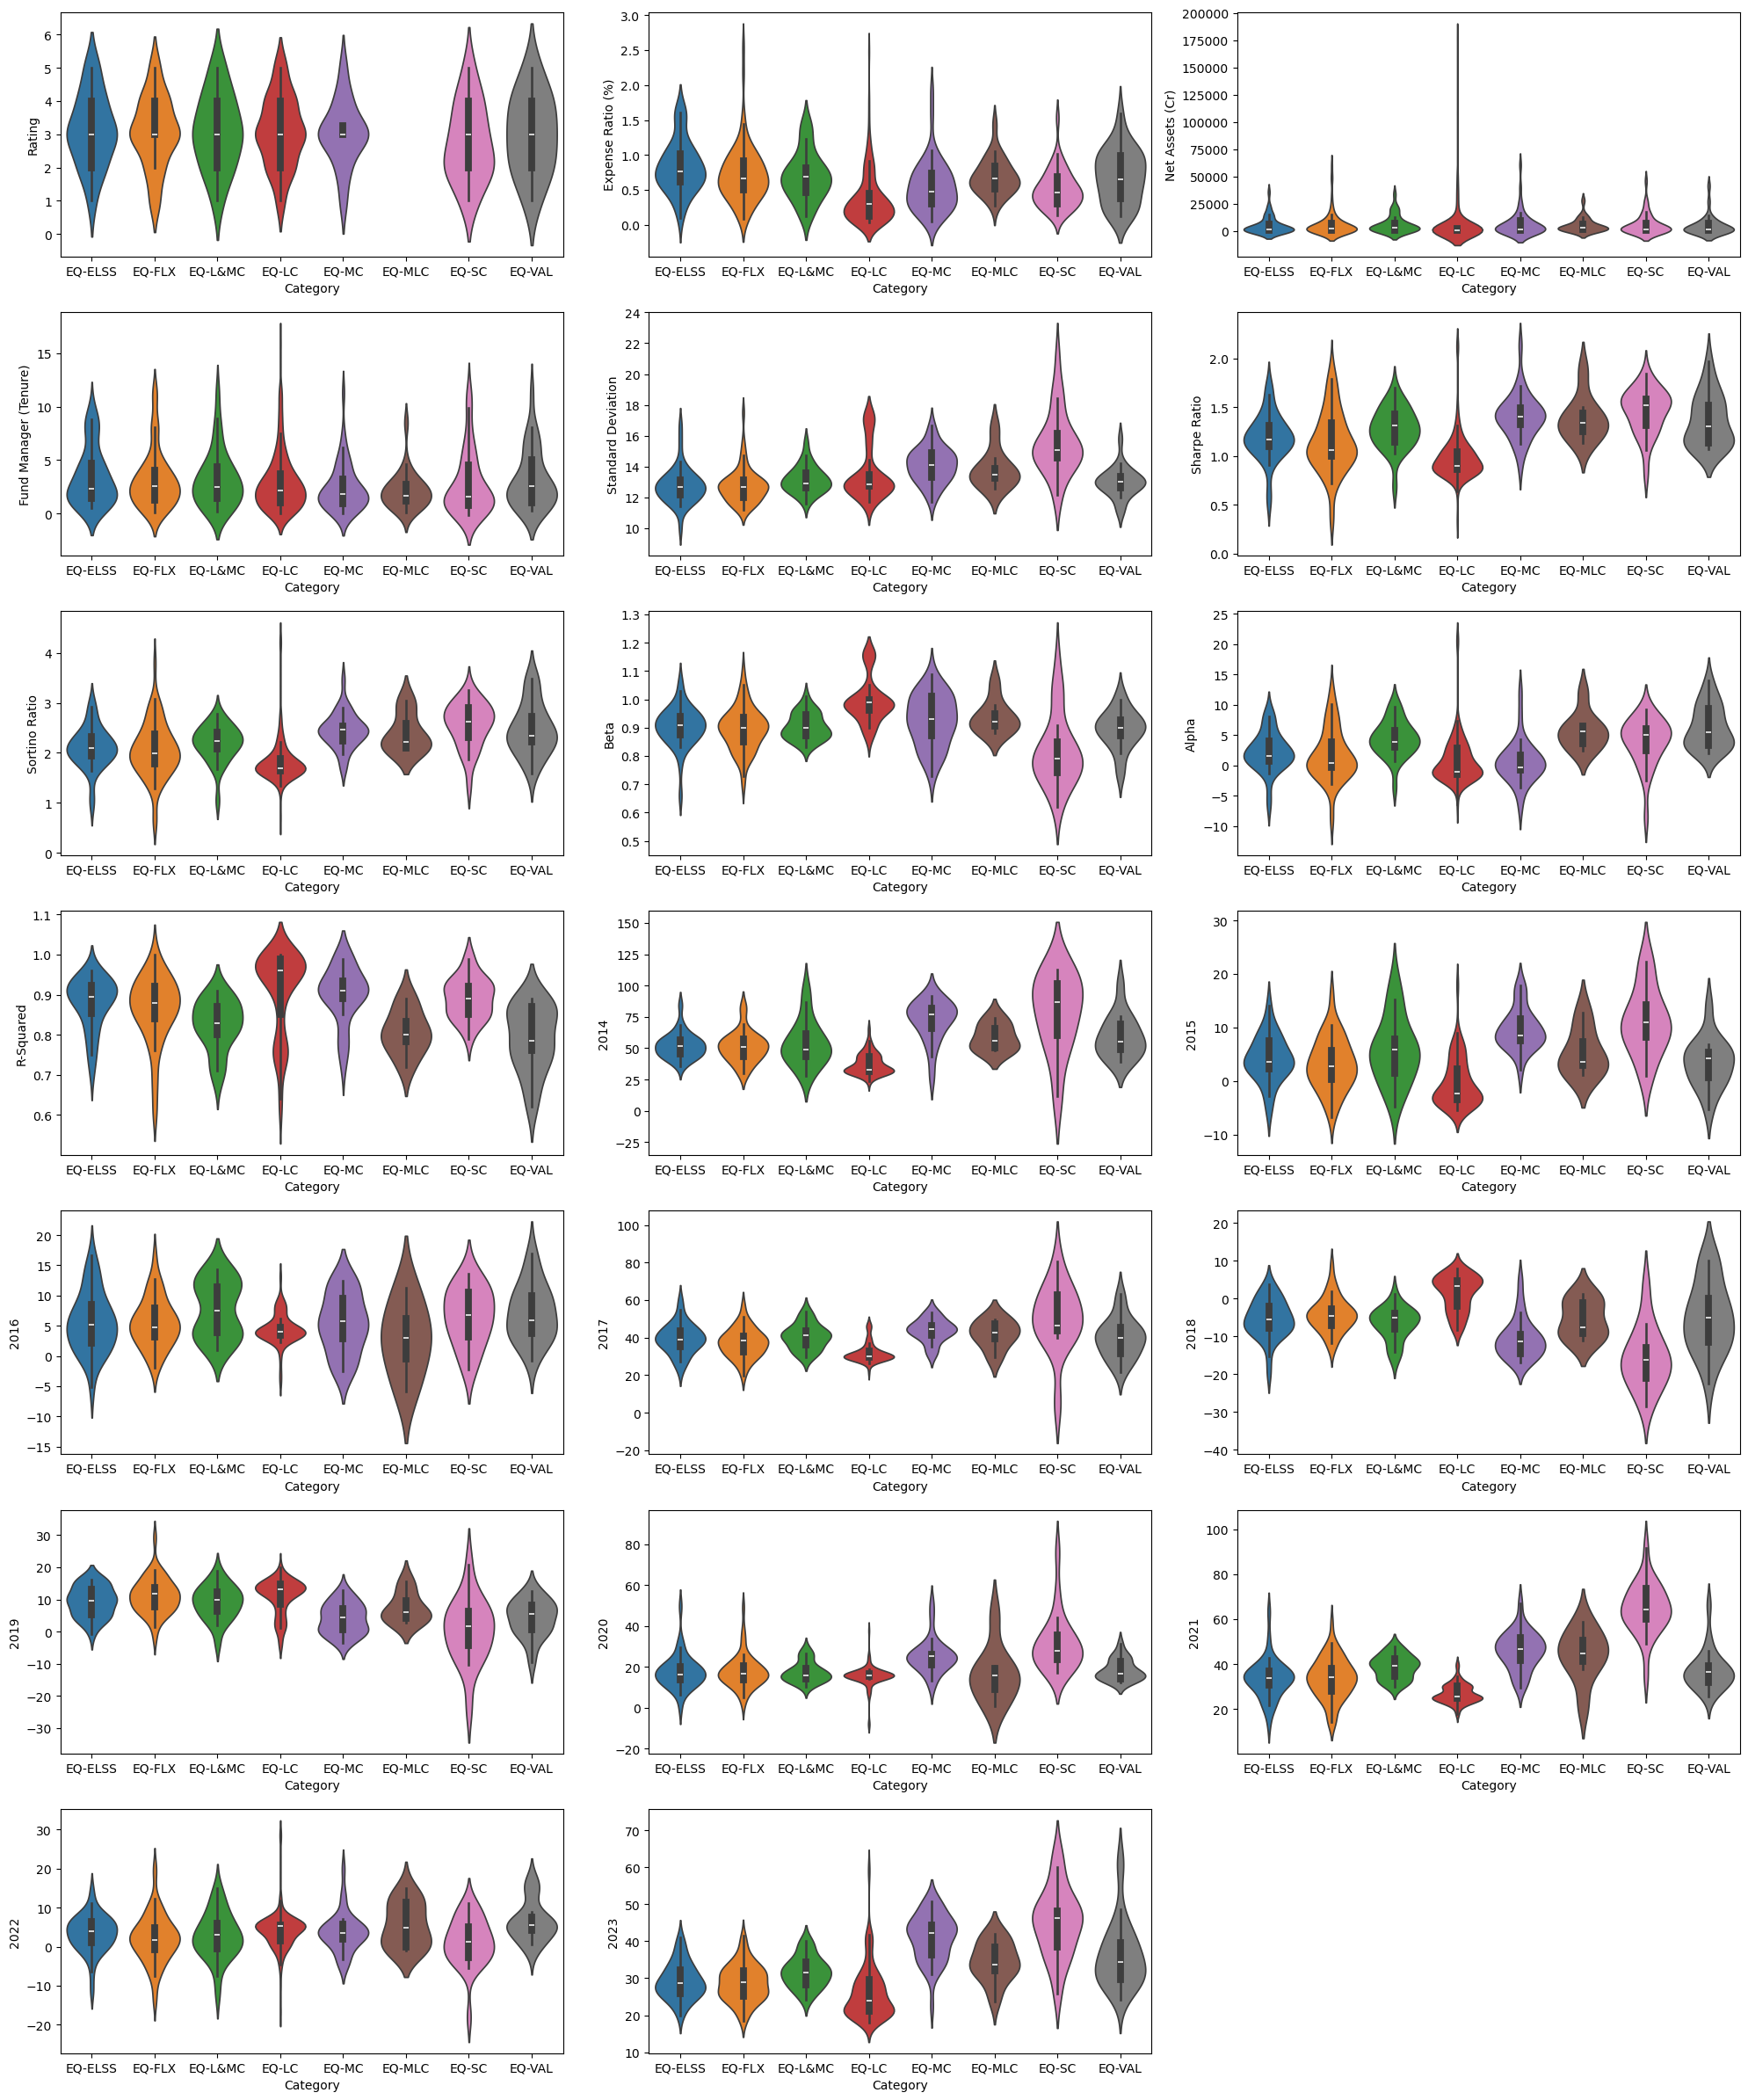

In [28]:
plt.figure(figsize=(20,24))
for i, col in enumerate(num_columns):
    plt.subplot(7, 3, i+1)
    sns.violinplot(data=all_eq, x='Category', y=all_eq.loc[:, num_columns[i]], hue='Category')
plt.tight_layout()

<Axes: xlabel='Category', ylabel='2023'>

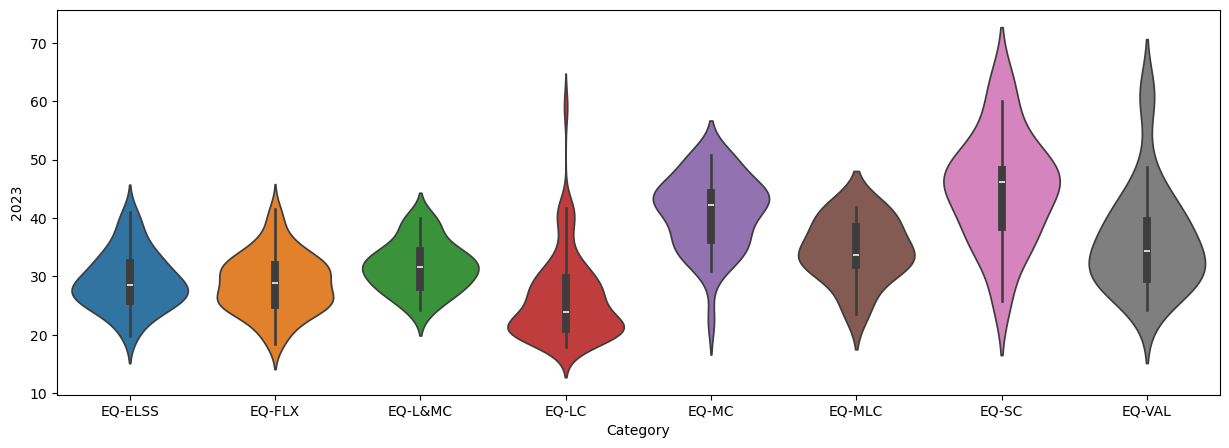

In [29]:
plt.figure(figsize=(15,5))
sns.violinplot(data=all_eq, x='Category', y=2023, hue='Category')

In [30]:
all_eq.groupby('Category').median(numeric_only=True).sort_values(by=2023)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Category,,,,,,,,,,,,,,,,,,,,
EQ-LC,3.0,0.30,440.0,2.20,12.84,0.900,1.690,0.99,-1.13,0.960,33.000,-2.380,4.030,30.020,3.390,13.130,15.695,25.495,5.37,23.945
EQ-ELSS,3.0,0.77,1227.0,2.35,12.70,1.165,2.100,0.91,1.61,0.895,52.050,3.610,5.170,39.090,-5.630,9.680,16.235,33.800,3.88,28.585
EQ-FLX,3.0,0.66,1750.0,2.55,12.67,1.060,1.990,0.90,0.34,0.880,50.705,2.835,4.780,38.310,-4.485,11.805,16.580,34.100,1.79,28.850
EQ-L&MC,3.0,0.69,2849.0,2.50,12.91,1.310,2.230,0.90,3.94,0.830,49.110,5.815,7.455,41.240,-5.140,9.860,16.050,39.460,2.97,31.625
EQ-MLC,NaN,0.66,2579.0,1.70,13.46,1.335,2.225,0.92,5.61,0.800,55.825,3.620,2.980,42.435,-7.700,6.090,15.920,44.780,4.97,33.580
EQ-VAL,3.0,0.65,930.0,2.60,13.03,1.305,2.340,0.90,5.40,0.785,55.405,4.290,5.970,39.675,-5.125,5.645,16.840,36.520,5.50,34.300
EQ-MC,3.0,0.48,1404.0,1.80,14.08,1.400,2.460,0.93,-0.29,0.910,77.205,8.510,5.730,44.480,-11.320,4.510,25.330,46.860,3.61,42.150
EQ-SC,3.0,0.46,1524.0,1.55,15.05,1.520,2.630,0.79,5.07,0.890,86.520,10.920,6.750,46.200,-16.295,1.620,28.025,64.180,1.18,46.170


In [36]:
all_eq_mean = all_eq.groupby('Category').mean(numeric_only=True).sort_values(by=2023)

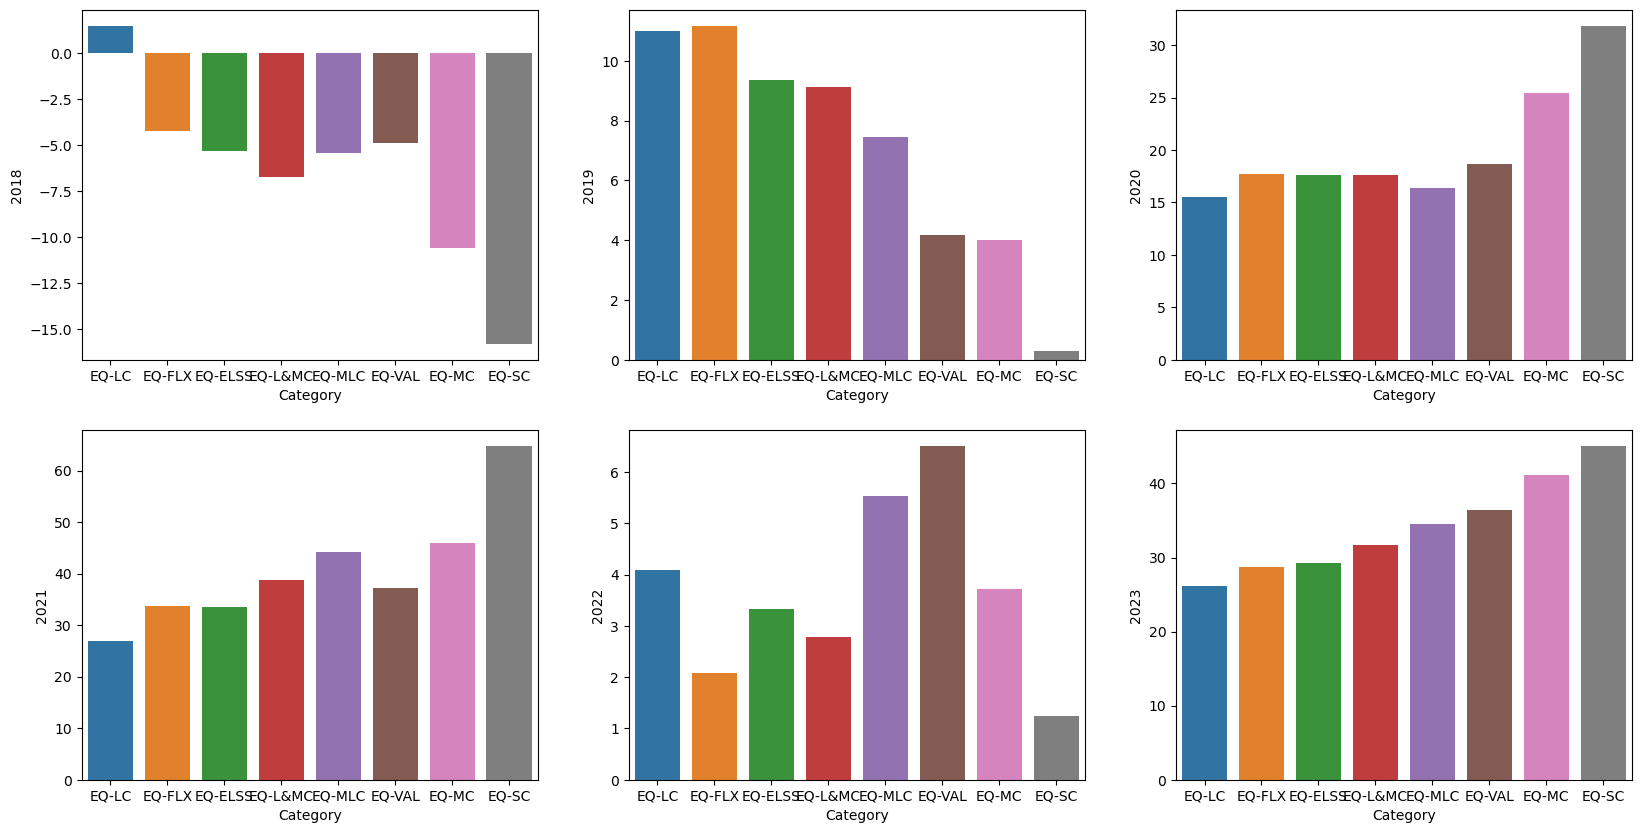

In [39]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(data=all_eq_mean, x=all_eq_mean.index, y=all_eq_mean.iloc[:, i+14], 
                hue=all_eq_mean.index, ax=ax)

In [42]:
df = all_eq.groupby('Category').mean(numeric_only=True).transpose().iloc[10:, :]
df

Category,EQ-ELSS,EQ-FLX,EQ-L&MC,EQ-LC,EQ-MC,EQ-MLC,EQ-SC,EQ-VAL
2014,52.144074,51.091563,53.911111,37.361053,72.201500,58.765000,78.493636,59.233571
2015,4.163333,3.162059,5.771667,-0.232586,9.677619,5.421667,11.162308,3.404286
2016,5.577419,5.514324,7.724500,4.454776,5.349524,2.840000,6.562308,7.162941
2017,39.478437,37.162895,40.615238,31.928732,43.861905,41.871667,50.288462,39.706111
2018,-5.317273,-4.241500,-6.727619,1.485063,-10.615000,-5.441429,-15.802857,-4.889444
2019,9.352424,11.148636,9.105909,10.980235,4.011304,7.440000,0.282353,4.161000
2020,17.633333,17.714615,17.621600,15.503333,25.393462,16.397500,31.793000,18.661000
2021,33.531111,33.702632,38.847778,26.930392,46.047857,44.203750,64.720000,37.298095
2022,3.337222,2.080462,2.785000,4.093390,3.711875,5.535385,1.250370,6.500000
2023,29.282105,28.756806,31.735000,26.141301,41.084651,34.478750,45.008065,36.379310


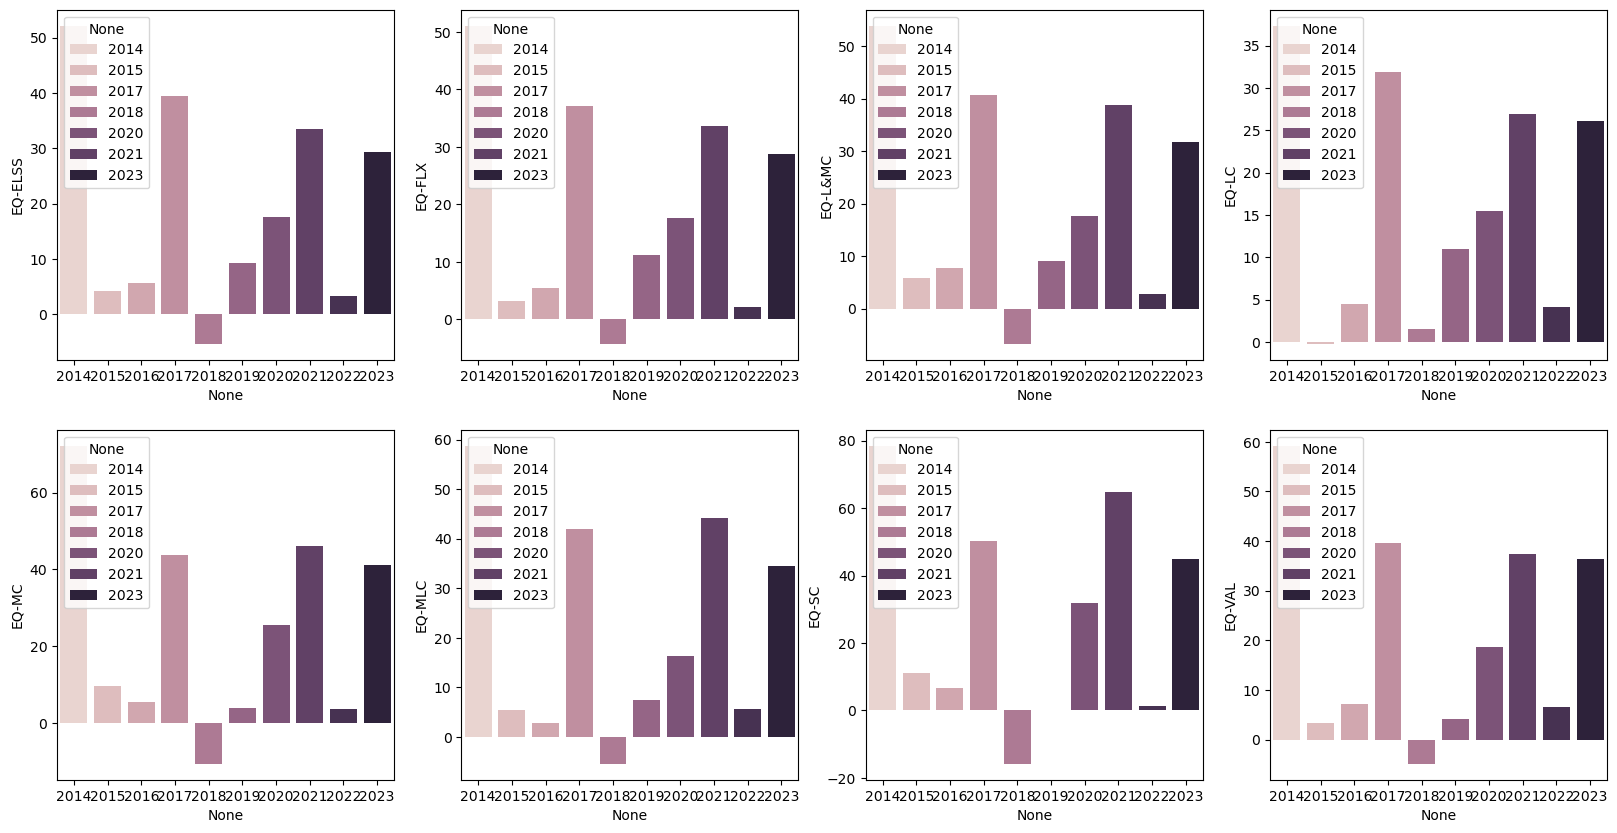

In [44]:
df = all_eq.groupby('Category').mean(numeric_only=True).transpose().iloc[10:, :]
fig, axes = plt.subplots(2,4,figsize=(20,10))
for i, ax in enumerate(axes.ravel()):
    sns.barplot(data=df, x=df.index, y=df.iloc[:, i], hue=df.index, ax=ax)

In [46]:
all_eq.groupby('Category').std(numeric_only=True).sort_values(by=2022)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Category,,,,,,,,,,,,,,,,,,,,
EQ-ELSS,1.082750,0.369951,7687.648544,2.653418,1.163440,0.239779,0.412820,0.070317,3.248682,0.064653,10.143661,4.281915,4.949649,8.014030,5.118534,4.703413,8.368408,8.690007,4.757886,4.882742
EQ-MC,0.961563,0.367332,11427.620523,2.205711,1.140739,0.230475,0.351647,0.090512,3.536890,0.069718,16.284227,3.812849,4.872730,6.089147,5.218580,4.702157,8.330649,8.341413,4.932774,6.208864
EQ-LC,1.051904,0.367217,18277.387264,2.671416,1.699566,0.224411,0.430781,0.078313,3.757591,0.103512,8.227141,4.544540,2.571399,4.942226,4.714667,5.367254,5.037971,4.158881,4.965259,7.110196
EQ-VAL,1.201850,0.384358,8761.616149,2.709474,0.965502,0.263863,0.517472,0.069457,3.565756,0.080711,16.906330,4.602059,4.714115,10.637391,9.271450,5.726558,5.192231,8.813299,5.112513,8.948064
EQ-MLC,NaN,0.257984,6327.790850,1.729855,1.208420,0.225954,0.384482,0.058493,2.992567,0.055275,10.713701,4.390059,6.112636,7.410672,5.022554,4.723981,13.444615,11.199941,5.676834,5.324255
EQ-L&MC,1.128648,0.346383,8032.443073,2.614713,0.877124,0.211572,0.362947,0.046182,2.985216,0.063268,18.080536,6.168127,4.647949,6.664168,4.320879,5.242057,5.008307,5.215442,5.992383,4.192487
EQ-FLX,1.056962,0.400963,10907.237172,2.688343,1.110192,0.314940,0.551459,0.075503,4.292603,0.084552,12.257319,4.878350,4.080915,7.699773,4.565162,5.548059,8.032509,9.019470,6.162825,4.995040
EQ-SC,1.164760,0.276171,9520.668065,2.956828,2.081225,0.230531,0.447356,0.125200,3.926510,0.050990,30.729274,6.211844,4.721155,17.929788,8.123028,9.941877,13.864732,11.275525,6.169586,9.263878


In [47]:
iqr = all_eq[num_columns + ['Category']].groupby('Category').quantile(.75) - \
      all_eq[num_columns + ['Category']].groupby('Category').quantile(.25)
iqr.sort_values(by=2023)

,Rating,Expense Ratio (%),Net Assets (Cr),Fund Manager (Tenure),Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Category,,,,,,,,,,,,,,,,,,,,
EQ-L&MC,2.00,0.3600,6037.00,3.000,0.9350,0.285,0.3500,0.075,2.7150,0.070,18.0575,6.4175,7.6275,7.6600,4.2300,6.1650,5.1000,7.4950,6.5500,6.1175
EQ-MLC,NaN,0.3275,4586.75,1.500,0.6525,0.190,0.4850,0.045,2.8250,0.050,15.7250,4.5075,6.7800,8.0075,8.1250,5.3250,10.3200,9.4700,11.5000,6.5075
EQ-ELSS,2.00,0.4100,6048.50,3.275,0.9850,0.215,0.4000,0.065,3.2900,0.070,11.2600,5.1800,6.5150,8.4900,5.6700,7.6800,6.5225,6.1425,5.2050,6.5325
EQ-FLX,1.00,0.4200,6116.50,2.750,1.1500,0.340,0.6000,0.085,4.2750,0.080,14.0250,5.3450,4.7900,8.6200,4.3475,6.0575,7.1250,10.2500,5.6700,6.8925
EQ-MC,0.25,0.4350,9034.50,2.300,1.6100,0.165,0.2950,0.140,2.4500,0.045,16.1150,4.2500,6.6900,5.4900,5.0525,6.6750,5.2225,10.3400,3.8025,8.0800
EQ-LC,2.00,0.3250,1630.25,2.700,0.7400,0.180,0.2400,0.040,4.2600,0.140,12.0800,5.7200,1.3600,3.2800,6.7350,6.5000,1.5550,5.5550,4.2150,8.6525
EQ-SC,2.00,0.3900,6929.00,3.750,1.5900,0.270,0.6100,0.110,3.5500,0.070,40.9450,6.1300,7.4800,19.2700,8.2650,10.6100,11.6300,13.6500,7.8150,9.8700
EQ-VAL,2.00,0.6225,6624.00,4.000,0.7100,0.390,0.5275,0.055,6.0275,0.110,20.5150,4.8600,6.3200,14.0825,11.6050,7.7050,8.7275,7.3300,3.4525,10.0100


In [48]:
pd.melt(iqr.reset_index(), id_vars=['Category'], )

,Category,variable,value
0,EQ-ELSS,Rating,2.0000
1,EQ-FLX,Rating,1.0000
2,EQ-L&MC,Rating,2.0000
3,EQ-LC,Rating,2.0000
4,EQ-MC,Rating,0.2500
...,...,...,...
155,EQ-LC,2023,8.6525
156,EQ-MC,2023,8.0800
157,EQ-MLC,2023,6.5075
158,EQ-SC,2023,9.8700


# Analysis of One Category

In [49]:
all_eq['Category'].unique()

array(['EQ-ELSS', 'EQ-FLX', 'EQ-L&MC', 'EQ-LC', 'EQ-MC', 'EQ-MLC',
       'EQ-SC', 'EQ-VAL'], dtype=object)

In [52]:
one_eq = all_eq[all_eq['Category'] == 'EQ-MC']

In [53]:
one_eq.iloc[:, 9:15]

,Standard Deviation,Sharpe Ratio,Sortino Ratio,Beta,Alpha,R-Squared
Funds,,,,,,
Aditya Birla Sun Life Mid Cap Fund - Direct Plan,14.05,1.33,2.52,0.92,-0.29,0.89
Aditya Birla Sun Life Nifty Midcap 150 Index Fund - Direct Plan,14.92,1.40,2.46,1.02,-0.44,0.99
Axis Midcap Fund - Direct Plan,13.15,1.16,2.20,0.80,-1.46,0.78
Axis Nifty Midcap 50 Index Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN
Bandhan Midcap Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN
Baroda BNP Paribas Midcap Fund - Direct Plan,12.61,1.49,2.39,0.82,1.68,0.89
Canara Robeco Mid Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN
DSP Midcap Fund - Direct Plan,14.61,0.89,1.70,0.96,-6.97,0.90
Edelweiss Mid Cap Fund - Direct Plan,14.08,1.52,2.79,0.94,1.84,0.94


<Axes: >

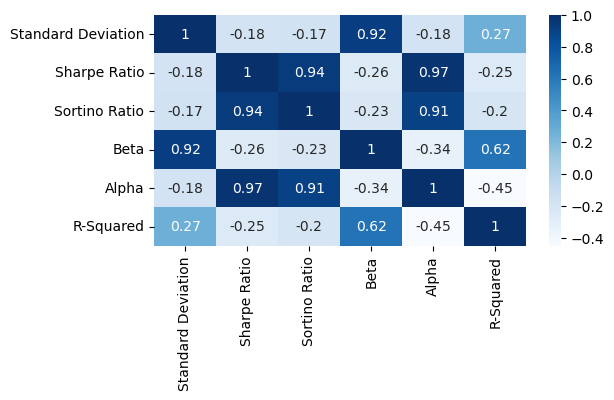

In [54]:
plt.figure(figsize=(6,3))
sns.heatmap(one_eq.iloc[:, 9:15].corr(), annot=True, cmap='Blues')

In [56]:
df = one_eq.iloc[:, -10:]
df

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,,
Aditya Birla Sun Life Mid Cap Fund - Direct Plan,74.10,11.27,6.54,46.25,-15.23,-2.86,16.67,51.71,-4.47,41.07
Aditya Birla Sun Life Nifty Midcap 150 Index Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.49,44.15
Axis Midcap Fund - Direct Plan,79.55,2.04,-1.92,43.60,4.59,12.80,27.77,41.78,-3.86,31.00
Axis Nifty Midcap 50 Index Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.07
Bandhan Midcap Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.67
Baroda BNP Paribas Midcap Fund - Direct Plan,67.27,16.80,0.22,51.21,-15.97,6.32,25.43,44.79,5.73,34.54
Canara Robeco Mid Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.70
DSP Midcap Fund - Direct Plan,71.67,7.95,12.32,41.03,-9.38,10.26,24.78,29.58,-3.97,39.75
Edelweiss Mid Cap Fund - Direct Plan,85.58,10.67,3.05,53.11,-14.49,6.84,28.45,52.45,3.98,40.44


In [57]:
df.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,,
Aditya Birla Sun Life Mid Cap Fund - Direct Plan,74.10,11.27,6.54,46.25,-15.23,-2.86,16.67,51.71,-4.47,41.07
Aditya Birla Sun Life Nifty Midcap 150 Index Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.49,44.15
Axis Midcap Fund - Direct Plan,79.55,2.04,-1.92,43.60,4.59,12.80,27.77,41.78,-3.86,31.00
Axis Nifty Midcap 50 Index Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.07
Bandhan Midcap Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.67


In [58]:
df.shape

(47, 10)

In [59]:
df.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,20.000000,21.000000,21.000000,21.000000,22.00000,23.000000,26.000000,28.000000,32.000000,43.000000
mean,72.201500,9.677619,5.349524,43.861905,-10.61500,4.011304,25.393462,46.047857,3.711875,41.084651
std,16.284227,3.812849,4.872730,6.089147,5.21858,4.702157,8.330649,8.341413,4.932774,6.208864
min,27.120000,2.040000,-2.580000,30.860000,-16.96000,-3.480000,10.670000,29.580000,-4.470000,22.470000
25%,65.777500,7.460000,2.850000,41.140000,-14.51250,0.560000,21.035000,41.517500,1.950000,36.220000
50%,77.205000,8.510000,5.730000,44.480000,-11.32000,4.510000,25.330000,46.860000,3.610000,42.150000
75%,81.892500,11.710000,9.540000,46.630000,-9.46000,7.235000,26.257500,51.857500,5.752500,44.300000
max,91.780000,17.920000,12.390000,53.660000,4.59000,12.800000,51.130000,66.920000,19.940000,50.830000


number of mutual funds in each year

In [60]:
df.count()

2014    20
2015    21
2016    21
2017    21
2018    22
2019    23
2020    26
2021    28
2022    32
2023    43
dtype: int64

number of years each mutual fund is operating

In [61]:
df.count(axis=1)

Funds
Aditya Birla Sun Life Mid Cap Fund - Direct Plan                   10
Aditya Birla Sun Life Nifty Midcap 150 Index Fund - Direct Plan     2
Axis Midcap Fund - Direct Plan                                     10
Axis Nifty Midcap 50 Index Fund - Direct Plan                       1
Bandhan Midcap Fund - Direct Plan                                   1
Baroda BNP Paribas Midcap Fund - Direct Plan                       10
Canara Robeco Mid Cap Fund - Direct Plan                            1
DSP Midcap Fund - Direct Plan                                      10
Edelweiss Mid Cap Fund - Direct Plan                               10
Edelweiss Nifty Midcap150 Momentum 50 Index Fund - Direct Plan      1
Franklin India Prima Fund - Direct Plan                            10
HDFC Mid-Cap Opportunities Fund - Direct Plan                      10
HDFC NIFTY Midcap 150 ETF                                           0
HDFC NIFTY Midcap 150 Index Fund - Direct Plan                      0
HSBC Midcap Fu

average return of all funds by year

In [62]:
df.mean()

2014    72.201500
2015     9.677619
2016     5.349524
2017    43.861905
2018   -10.615000
2019     4.011304
2020    25.393462
2021    46.047857
2022     3.711875
2023    41.084651
dtype: float64

percentage of funds having positive return by year

In [63]:
(df>0).sum() / df.count() * 100

2014    100.000000
2015    100.000000
2016     80.952381
2017    100.000000
2018      4.545455
2019     82.608696
2020    100.000000
2021    100.000000
2022     81.250000
2023    100.000000
dtype: float64

Select funds with minimum years of history and from recent years

In [64]:
dfd = df.iloc[:, :].dropna(thresh=3)
dfd.shape

(28, 10)

In [65]:
dfd.count(axis=1)

Funds
Aditya Birla Sun Life Mid Cap Fund - Direct Plan           10
Axis Midcap Fund - Direct Plan                             10
Baroda BNP Paribas Midcap Fund - Direct Plan               10
DSP Midcap Fund - Direct Plan                              10
Edelweiss Mid Cap Fund - Direct Plan                       10
Franklin India Prima Fund - Direct Plan                    10
HDFC Mid-Cap Opportunities Fund - Direct Plan              10
HSBC Midcap Fund - Direct Plan                             10
ICICI Prudential Midcap Fund - Direct Plan                 10
ICICI Prudential Nifty Midcap 150 ETF                       3
Invesco India Mid Cap Fund - Direct Plan                   10
Kotak Emerging Equity Fund - Direct Plan                   10
LIC MF Midcap Fund - Direct Plan                            6
Mahindra Manulife Mid Cap Fund - Direct Plan                5
Mirae Asset Midcap Fund - Direct Plan                       4
Motilal Oswal Midcap Fund - Direct Plan                     9
Mo

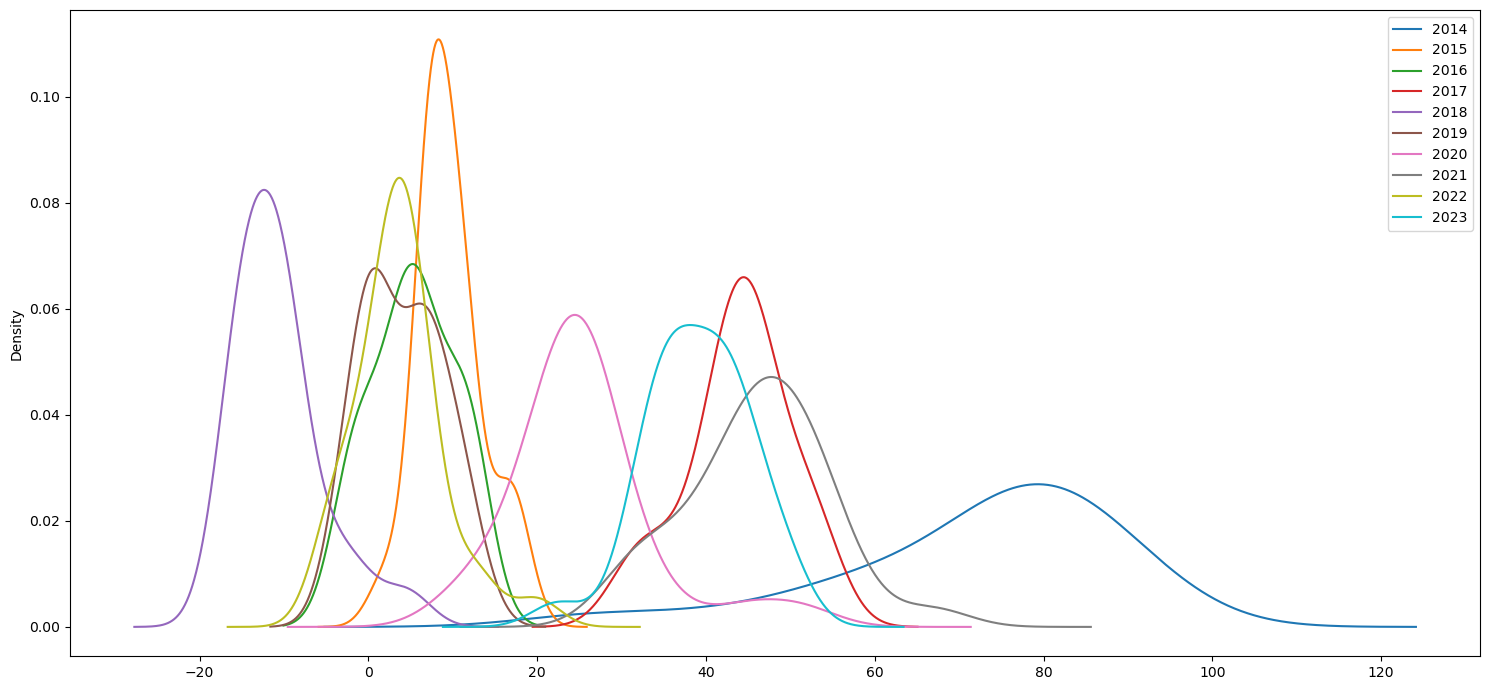

In [66]:
dfd.plot.kde(figsize=(15,7))
plt.tight_layout()
plt.show()

# CAGR

Cumulative Annual Growth Rate

In [67]:
def total_return(x):
    s = 1
    for i in x:
        if not np.isnan(i):
            s *= (1 + i/100)
    return s

In [68]:
cagr = (dfd.apply(lambda row : total_return(row), axis=1)**(1/dfd.count(axis=1)) - 1).sort_values(ascending=False)
cagr.name = 'cagr'

In [69]:
cagr.sort_values(ascending=False)

Funds
ICICI Prudential Nifty Midcap 150 ETF                      0.302093
Motilal Oswal Nifty Midcap 150 Index Fund - Direct Plan    0.290086
Nippon India ETF Nifty Midcap 150                          0.289627
Mirae Asset Midcap Fund - Direct Plan                      0.287462
Union Midcap Fund - Direct Plan                            0.270256
Mahindra Manulife Mid Cap Fund - Direct Plan               0.245263
Kotak Emerging Equity Fund - Direct Plan                   0.240975
Edelweiss Mid Cap Fund - Direct Plan                       0.238131
HDFC Mid-Cap Opportunities Fund - Direct Plan              0.229109
Invesco India Mid Cap Fund - Direct Plan                   0.224793
Tata Midcap Growth Fund - Direct Plan                      0.221364
HSBC Midcap Fund - Direct Plan                             0.217759
Nippon India Growth Fund - Direct Plan                     0.216163
Axis Midcap Fund - Direct Plan                             0.213867
SBI Magnum Midcap Fund - Direct Plan      

# Ergodic Sum

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
values = dfd.to_numpy()

In [72]:
scaled = StandardScaler(with_mean=False, with_std=True).fit_transform(values)

In [73]:
scaled = np.round(scaled, 3)

In [74]:
scaled_dfd = pd.DataFrame(scaled, index=dfd.index, columns=dfd.columns)

In [75]:
scaled_dfd

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,,
Aditya Birla Sun Life Mid Cap Fund - Direct Plan,4.669,3.029,1.375,7.783,-2.987,-0.622,2.041,6.313,-0.862,6.869
Axis Midcap Fund - Direct Plan,5.012,0.548,-0.404,7.337,0.900,2.783,3.399,5.101,-0.744,5.185
Baroda BNP Paribas Midcap Fund - Direct Plan,4.238,4.515,0.046,8.618,-3.132,1.374,3.113,5.468,1.104,5.777
DSP Midcap Fund - Direct Plan,4.516,2.137,2.591,6.905,-1.840,2.231,3.033,3.611,-0.765,6.648
Edelweiss Mid Cap Fund - Direct Plan,5.392,2.868,0.641,8.937,-2.842,1.487,3.483,6.403,0.767,6.763
Franklin India Prima Fund - Direct Plan,5.052,2.214,2.006,6.923,-1.653,0.981,2.297,4.111,0.578,6.350
HDFC Mid-Cap Opportunities Fund - Direct Plan,4.905,1.833,2.606,7.246,-1.989,0.200,2.764,4.991,2.523,7.601
HSBC Midcap Fund - Direct Plan,5.236,3.152,2.244,9.030,-2.191,0.224,2.506,3.902,0.403,6.946
ICICI Prudential Midcap Fund - Direct Plan,5.577,1.634,1.205,7.485,-1.902,0.083,2.474,5.635,0.794,5.666


In [76]:
(scaled_dfd > 0).sum()/scaled_dfd.count()

2014    1.000000
2015    1.000000
2016    0.809524
2017    1.000000
2018    0.045455
2019    0.826087
2020    1.000000
2021    1.000000
2022    0.785714
2023    1.000000
dtype: float64

In [77]:
ergodic = (scaled_dfd[scaled_dfd>0].sum(axis=1).add(2*scaled_dfd[scaled_dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False)
ergodic.name = 'ergodic'
ergodic

Funds
ICICI Prudential Nifty Midcap 150 ETF                      4.640000
Motilal Oswal Nifty Midcap 150 Index Fund - Direct Plan    4.257500
Nippon India ETF Nifty Midcap 150                          4.254500
Mirae Asset Midcap Fund - Direct Plan                      4.153750
Union Midcap Fund - Direct Plan                            3.998333
Mahindra Manulife Mid Cap Fund - Direct Plan               3.813400
Kotak Emerging Equity Fund - Direct Plan                   3.205800
Edelweiss Mid Cap Fund - Direct Plan                       3.105700
HDFC Mid-Cap Opportunities Fund - Direct Plan              3.069100
Invesco India Mid Cap Fund - Direct Plan                   3.066400
Motilal Oswal Midcap Fund - Direct Plan                    3.049889
Nippon India Growth Fund - Direct Plan                     2.979900
HSBC Midcap Fund - Direct Plan                             2.926100
Tata Midcap Growth Fund - Direct Plan                      2.884500
Quant Mid Cap Fund - Direct Plan          

without standardizing

In [78]:
(dfd[dfd>0].sum(axis=1).add(2*dfd[dfd<0].sum(axis=1))/dfd.count(axis=1)).sort_values(ascending=False).head(10)

Funds
ICICI Prudential Nifty Midcap 150 ETF                      31.856667
Motilal Oswal Nifty Midcap 150 Index Fund - Direct Plan    30.232500
Nippon India ETF Nifty Midcap 150                          30.212500
Mirae Asset Midcap Fund - Direct Plan                      29.780000
Union Midcap Fund - Direct Plan                            28.850000
Mahindra Manulife Mid Cap Fund - Direct Plan               26.252000
Kotak Emerging Equity Fund - Direct Plan                   25.684000
Edelweiss Mid Cap Fund - Direct Plan                       25.559000
Invesco India Mid Cap Fund - Direct Plan                   24.535000
HDFC Mid-Cap Opportunities Fund - Direct Plan              24.276000
dtype: float64

# Average Ranking

Ranking of each fund in each year - bigger number is better

In [79]:
dfdr = dfd.rank(axis=0, ascending = True)
dfdr

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,,
Aditya Birla Sun Life Mid Cap Fund - Direct Plan,9.0,15.0,14.0,14.0,3.5,2.0,3.0,21.0,1.0,17.0
Axis Midcap Fund - Direct Plan,12.0,1.0,2.0,10.0,22.0,23.0,21.0,9.0,3.0,2.0
Baroda BNP Paribas Midcap Fund - Direct Plan,6.0,20.0,5.0,19.0,2.0,15.0,15.0,11.0,20.0,7.0
DSP Midcap Fund - Direct Plan,7.0,8.0,20.0,5.0,17.0,21.0,12.0,1.0,2.0,15.0
Edelweiss Mid Cap Fund - Direct Plan,17.0,14.0,7.0,20.0,7.0,16.0,22.0,23.0,17.0,16.0
Franklin India Prima Fund - Direct Plan,14.0,9.0,16.0,6.0,18.0,12.0,4.0,4.0,12.0,13.0
HDFC Mid-Cap Opportunities Fund - Direct Plan,11.0,4.0,21.0,8.0,15.0,9.0,9.0,7.0,27.0,25.0
HSBC Midcap Fund - Direct Plan,16.0,17.0,17.0,21.0,12.0,10.0,6.0,2.0,11.0,19.0
ICICI Prudential Midcap Fund - Direct Plan,18.0,2.0,11.0,11.0,16.0,5.0,5.0,13.0,19.0,5.0


Percentile ranking of funds

In [80]:
dfdr = dfdr/dfdr.count()*100
dfdr

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,,
Aditya Birla Sun Life Mid Cap Fund - Direct Plan,45.0,71.428571,66.666667,66.666667,15.909091,8.695652,11.538462,75.000000,3.571429,60.714286
Axis Midcap Fund - Direct Plan,60.0,4.761905,9.523810,47.619048,100.000000,100.000000,80.769231,32.142857,10.714286,7.142857
Baroda BNP Paribas Midcap Fund - Direct Plan,30.0,95.238095,23.809524,90.476190,9.090909,65.217391,57.692308,39.285714,71.428571,25.000000
DSP Midcap Fund - Direct Plan,35.0,38.095238,95.238095,23.809524,77.272727,91.304348,46.153846,3.571429,7.142857,53.571429
Edelweiss Mid Cap Fund - Direct Plan,85.0,66.666667,33.333333,95.238095,31.818182,69.565217,84.615385,82.142857,60.714286,57.142857
Franklin India Prima Fund - Direct Plan,70.0,42.857143,76.190476,28.571429,81.818182,52.173913,15.384615,14.285714,42.857143,46.428571
HDFC Mid-Cap Opportunities Fund - Direct Plan,55.0,19.047619,100.000000,38.095238,68.181818,39.130435,34.615385,25.000000,96.428571,89.285714
HSBC Midcap Fund - Direct Plan,80.0,80.952381,80.952381,100.000000,54.545455,43.478261,23.076923,7.142857,39.285714,67.857143
ICICI Prudential Midcap Fund - Direct Plan,90.0,9.523810,52.380952,52.380952,72.727273,21.739130,19.230769,46.428571,67.857143,17.857143


## Funds in top percentile

In [81]:
top_percentile = (dfdr[dfdr>=50].count(axis=1)/dfdr.count(axis=1)).sort_values(ascending=False)

In [82]:
top_percentile.name = 'top_percentile'

In [83]:
top_percentile.head(10)

Funds
Nippon India ETF Nifty Midcap 150                          1.000000
Edelweiss Mid Cap Fund - Direct Plan                       0.800000
Kotak Emerging Equity Fund - Direct Plan                   0.800000
Motilal Oswal Midcap Fund - Direct Plan                    0.777778
Mirae Asset Midcap Fund - Direct Plan                      0.750000
Motilal Oswal Nifty Midcap 150 Index Fund - Direct Plan    0.750000
ICICI Prudential Nifty Midcap 150 ETF                      0.666667
Taurus Mid Cap Fund - Direct Plan                          0.600000
Tata Midcap Growth Fund - Direct Plan                      0.600000
HSBC Midcap Fund - Direct Plan                             0.600000
Name: top_percentile, dtype: float64

## Average percentile rank

In [84]:
dfdr['rank'] = dfdr.sum(axis=1)/dfdr.count(axis=1)/100

In [85]:
dfdr.sort_values(by='rank', ascending=False)

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,rank
Funds,,,,,,,,,,,
Edelweiss Mid Cap Fund - Direct Plan,85.0,66.666667,33.333333,95.238095,31.818182,69.565217,84.615385,82.142857,60.714286,57.142857,0.666237
Kotak Emerging Equity Fund - Direct Plan,95.0,61.904762,90.476190,57.142857,59.090909,86.956522,42.307692,67.857143,82.142857,14.285714,0.657165
Mirae Asset Midcap Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,76.923077,71.428571,78.571429,35.714286,0.656593
Motilal Oswal Midcap Fund - Direct Plan,NaN,100.000000,61.904762,9.523810,50.000000,95.652174,3.846154,96.428571,92.857143,75.000000,0.650236
Motilal Oswal Nifty Midcap 150 Index Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,69.230769,53.571429,48.214286,85.714286,0.641827
ICICI Prudential Nifty Midcap 150 ETF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.285714,48.214286,78.571429,0.636905
Nippon India ETF Nifty Midcap 150,NaN,NaN,NaN,NaN,NaN,NaN,53.846154,60.714286,53.571429,82.142857,0.625687
Mahindra Manulife Mid Cap Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,73.913043,26.923077,78.571429,32.142857,96.428571,0.615958
Tata Midcap Growth Fund - Direct Plan,75.0,85.714286,14.285714,85.714286,45.454545,82.608696,61.538462,28.571429,28.571429,71.428571,0.578887


# More than mean returns

In [86]:
dfd.mean()

2014    72.201500
2015     9.677619
2016     5.349524
2017    43.861905
2018   -10.615000
2019     4.011304
2020    25.393462
2021    46.047857
2022     3.738929
2023    39.037143
dtype: float64

Excess return of fund (fund return - mean return in year)

In [87]:
dfdm = dfd-dfd.mean()
dfdm

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,,
Aditya Birla Sun Life Mid Cap Fund - Direct Plan,1.8985,1.592381,1.190476,2.388095,-4.615,-6.871304,-8.723462,5.662143,-8.208929,2.032857
Axis Midcap Fund - Direct Plan,7.3485,-7.637619,-7.269524,-0.261905,15.205,8.788696,2.376538,-4.267857,-7.598929,-8.037143
Baroda BNP Paribas Midcap Fund - Direct Plan,-4.9315,7.122381,-5.129524,7.348095,-5.355,2.308696,0.036538,-1.257857,1.991071,-4.497143
DSP Midcap Fund - Direct Plan,-0.5315,-1.727619,6.970476,-2.831905,1.235,6.248696,-0.613462,-16.467857,-7.708929,0.712857
Edelweiss Mid Cap Fund - Direct Plan,13.3785,0.992381,-2.299524,9.248095,-3.875,2.828696,3.056538,6.402143,0.241071,1.402857
Franklin India Prima Fund - Direct Plan,7.9785,-1.437619,4.190476,-2.721905,2.185,0.498696,-6.633462,-12.377857,-0.738929,-1.067143
HDFC Mid-Cap Opportunities Fund - Direct Plan,5.6485,-2.857619,7.040476,-0.801905,0.475,-3.091304,-2.813462,-5.167857,9.351071,6.412857
HSBC Midcap Fund - Direct Plan,10.8985,2.052381,5.320476,9.798095,-0.555,-2.981304,-4.923462,-14.087857,-1.648929,2.492857
ICICI Prudential Midcap Fund - Direct Plan,16.3085,-3.597619,0.380476,0.618095,0.915,-3.631304,-5.183462,0.112143,0.381071,-5.157143


## alpha

In [88]:
alpha = (dfdm.sum(axis=1)/dfdm.count(axis=1)).sort_values(ascending=False)
alpha.name = 'alpha'
alpha

Funds
Edelweiss Mid Cap Fund - Direct Plan                       3.137576
Kotak Emerging Equity Fund - Direct Plan                   2.879576
Mahindra Manulife Mid Cap Fund - Direct Plan               2.606261
ICICI Prudential Nifty Midcap 150 ETF                      2.248690
Motilal Oswal Nifty Midcap 150 Index Fund - Direct Plan    1.678152
Nippon India ETF Nifty Midcap 150                          1.658152
Motilal Oswal Midcap Fund - Direct Plan                    1.517473
HDFC Mid-Cap Opportunities Fund - Direct Plan              1.419576
Mirae Asset Midcap Fund - Direct Plan                      1.225652
Tata Midcap Growth Fund - Direct Plan                      1.140576
Invesco India Mid Cap Fund - Direct Plan                   1.023576
HSBC Midcap Fund - Direct Plan                             0.636576
UTI Mid Cap Fund - Direct Plan                             0.515576
ICICI Prudential Midcap Fund - Direct Plan                 0.114576
SBI Magnum Midcap Fund - Direct Plan      

## Funds consistently given positive excess returns

In [89]:
dfdm['consistency'] = dfdm[dfdm > 0].count(axis=1)*100/dfdm.count(axis=1)/100

In [90]:
dfdm.sort_values(by='consistency', ascending=False).head(10)

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,consistency
Funds,,,,,,,,,,,
Edelweiss Mid Cap Fund - Direct Plan,13.3785,0.992381,-2.299524,9.248095,-3.875,2.828696,3.056538,6.402143,0.241071,1.402857,0.800000
Mirae Asset Midcap Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,0.906538,4.552143,2.441071,-2.997143,0.750000
Motilal Oswal Nifty Midcap 150 Index Fund - Direct Plan,NaN,NaN,NaN,NaN,NaN,NaN,0.726538,0.842143,-0.128929,5.272857,0.750000
Kotak Emerging Equity Fund - Direct Plan,16.6585,0.302381,6.650476,1.118095,-0.045,6.228696,-1.923462,3.122143,2.701071,-6.017143,0.700000
Motilal Oswal Midcap Fund - Direct Plan,NaN,8.242381,1.140476,-11.281905,-0.855,6.938696,-14.723462,11.732143,8.241071,4.222857,0.666667
ICICI Prudential Nifty Midcap 150 ETF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.682143,-0.128929,5.192857,0.666667
Tata Midcap Growth Fund - Direct Plan,9.2885,2.102381,-6.939524,7.088095,-1.565,3.968696,0.486538,-4.317857,-1.818929,3.112857,0.600000
SBI Magnum Midcap Fund - Direct Plan,0.9085,6.432381,0.900476,-8.841905,-6.345,-3.121304,6.216538,7.582143,0.211071,-3.367143,0.600000
Nippon India Growth Fund - Direct Plan,-16.2215,-2.627619,-0.979524,1.458095,0.415,3.418696,-2.493462,1.512143,2.931071,10.722857,0.600000


# All Metrics

In [91]:
all_metrics = (dfdm['consistency'].to_frame().join(top_percentile).join(dfdr['rank']).join(cagr).join(ergodic).join(alpha)).sort_values(by=['ergodic'], ascending=False)

In [92]:
all_metrics.columns.append(one_eq.columns[9:12])

Index(['consistency', 'top_percentile', 'rank', 'cagr', 'ergodic', 'alpha',
       'Standard Deviation', 'Sharpe Ratio', 'Sortino Ratio'],
      dtype='object')

In [93]:
all_metrics.join(one_eq).loc[:, all_metrics.columns.append(one_eq.columns[9:12])]

,consistency,top_percentile,rank,cagr,ergodic,alpha,Standard Deviation,Sharpe Ratio,Sortino Ratio
Funds,,,,,,,,,
ICICI Prudential Nifty Midcap 150 ETF,0.666667,0.666667,0.636905,0.302093,4.640000,2.248690,14.92,1.40,2.46
Motilal Oswal Nifty Midcap 150 Index Fund - Direct Plan,0.750000,0.750000,0.641827,0.290086,4.257500,1.678152,14.91,1.39,2.46
Nippon India ETF Nifty Midcap 150,0.500000,1.000000,0.625687,0.289627,4.254500,1.658152,14.90,1.40,2.38
Mirae Asset Midcap Fund - Direct Plan,0.750000,0.750000,0.656593,0.287462,4.153750,1.225652,14.04,1.34,2.23
Union Midcap Fund - Direct Plan,0.333333,0.333333,0.440476,0.270256,3.998333,-0.484643,14.15,1.35,2.36
Mahindra Manulife Mid Cap Fund - Direct Plan,0.600000,0.600000,0.615958,0.245263,3.813400,2.606261,15.14,1.53,2.53
Kotak Emerging Equity Fund - Direct Plan,0.700000,0.800000,0.657165,0.240975,3.205800,2.879576,12.32,1.48,2.45
Edelweiss Mid Cap Fund - Direct Plan,0.800000,0.800000,0.666237,0.238131,3.105700,3.137576,14.08,1.52,2.79
HDFC Mid-Cap Opportunities Fund - Direct Plan,0.500000,0.500000,0.564785,0.229109,3.069100,1.419576,13.12,1.72,2.91


In [94]:
all_eq.loc[all_metrics.index]

,Rating,Category,Expense Ratio (%),Launch,Net Assets (Cr),Fund Manager (Tenure),Fund Risk Grade,Fund Return Grade,Riskometer,Standard Deviation,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Funds,,,,,,,,,,,,,,,,,,,,,
ICICI Prudential Nifty Midcap 150 ETF,NaN,EQ-MC,0.15,2020-01-24,313.0,3.3,NaN,NaN,Very High,14.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.73,3.61,44.23
Motilal Oswal Nifty Midcap 150 Index Fund - Direct Plan,3.0,EQ-MC,0.30,2019-09-06,1404.0,4.7,Above Average,Above Average,Very High,14.91,...,NaN,NaN,NaN,NaN,NaN,NaN,26.12,46.89,3.61,44.31
Nippon India ETF Nifty Midcap 150,NaN,EQ-MC,0.21,2019-01-31,1312.0,0.4,NaN,NaN,Very High,14.90,...,NaN,NaN,NaN,NaN,NaN,NaN,25.34,47.60,3.62,44.29
Mirae Asset Midcap Fund - Direct Plan,3.0,EQ-MC,0.62,2019-07-29,14252.0,4.8,Average,Average,Very High,14.04,...,NaN,NaN,NaN,NaN,NaN,NaN,26.30,50.60,6.18,36.04
Union Midcap Fund - Direct Plan,3.0,EQ-MC,0.67,2020-03-23,1065.0,4.2,Above Average,Average,Very High,14.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.98,-0.82,34.21
Mahindra Manulife Mid Cap Fund - Direct Plan,4.0,EQ-MC,0.48,2018-01-30,2202.0,3.4,Average,Above Average,Very High,15.14,...,NaN,NaN,NaN,NaN,NaN,7.04,20.67,52.30,1.96,49.29
Kotak Emerging Equity Fund - Direct Plan,4.0,EQ-MC,0.37,2013-01-01,39685.0,0.3,Low,Average,Very High,12.32,...,88.86,9.98,12.00,44.98,-10.66,10.24,23.47,49.17,6.44,33.02
Edelweiss Mid Cap Fund - Direct Plan,4.0,EQ-MC,0.43,2013-01-01,5115.0,2.6,Average,Above Average,Very High,14.08,...,85.58,10.67,3.05,53.11,-14.49,6.84,28.45,52.45,3.98,40.44
HDFC Mid-Cap Opportunities Fund - Direct Plan,4.0,EQ-MC,0.75,2013-01-01,60418.0,11.3,Below Average,Above Average,Very High,13.12,...,77.85,6.82,12.39,43.06,-10.14,0.92,22.58,40.88,13.09,45.45


In [95]:
high = [2007,2009,2010,2012,2014,2017,2020,2021,2023]
low = [2008,2011,2013,2015,2016,2018,2019,2022]
s1 = dfdm.loc[:, high[-3:]].mean(axis=1).rename('high')
s2 = dfdm.loc[:, low[-3:]].mean(axis=1).rename('low')
hl = pd.concat([s1, s2], axis=1)
hl['diff'] = hl['high'] - hl['low']
hl.sort_values('low', ascending=False)

,high,low,diff
Funds,,,
Quant Mid Cap Fund - Direct Plan,8.027179,6.731589,1.295590
Axis Midcap Fund - Direct Plan,-3.309487,5.464922,-8.774410
Motilal Oswal Midcap Fund - Direct Plan,0.410513,4.774922,-4.364410
Kotak Emerging Equity Fund - Direct Plan,-1.606154,2.961589,-4.567743
Mirae Asset Midcap Fund - Direct Plan,0.820513,2.441071,-1.620559
Nippon India Growth Fund - Direct Plan,3.247179,2.254922,0.992257
HDFC Mid-Cap Opportunities Fund - Direct Plan,-0.522821,2.244922,-2.767743
Invesco India Mid Cap Fund - Direct Plan,-1.086154,2.224922,-3.311076
Taurus Mid Cap Fund - Direct Plan,-4.152821,1.851589,-6.004410


<Axes: >

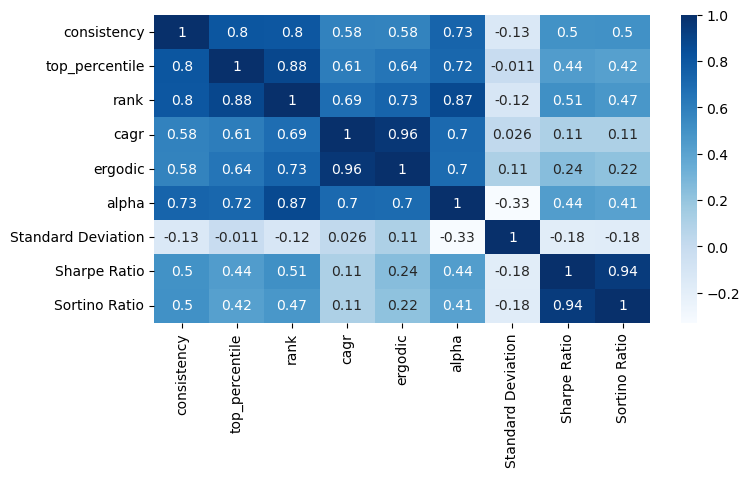

In [96]:
plt.figure(figsize=(8,4))
sns.heatmap(all_metrics.join(one_eq).loc[:, all_metrics.columns.append(one_eq.columns[9:12])].corr(), annot=True, cmap='Blues')

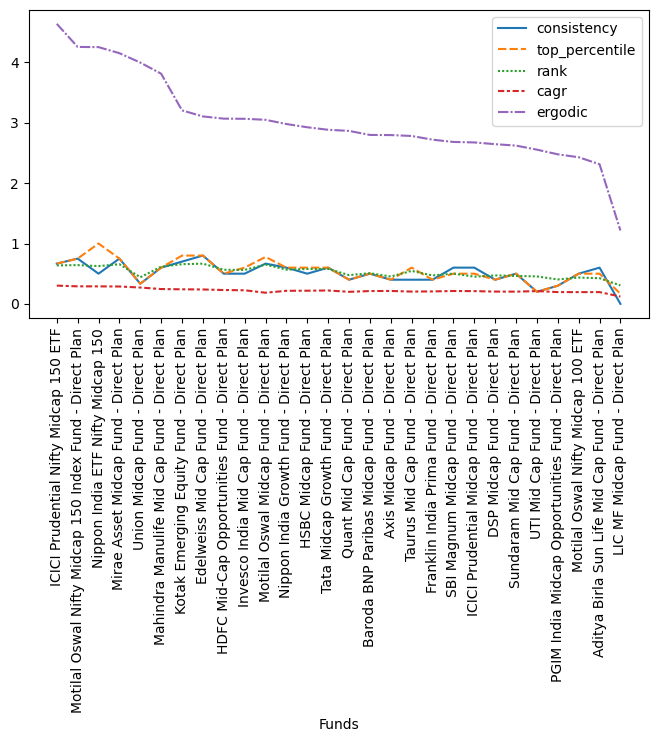

In [97]:
plt.figure(figsize=(8,4))
sns.lineplot(data=all_metrics.iloc[:, :5], sort=False)
# plt.xticks(np.arange(len(all_metrics)), [])
plt.xticks(rotation=90)
plt.show()

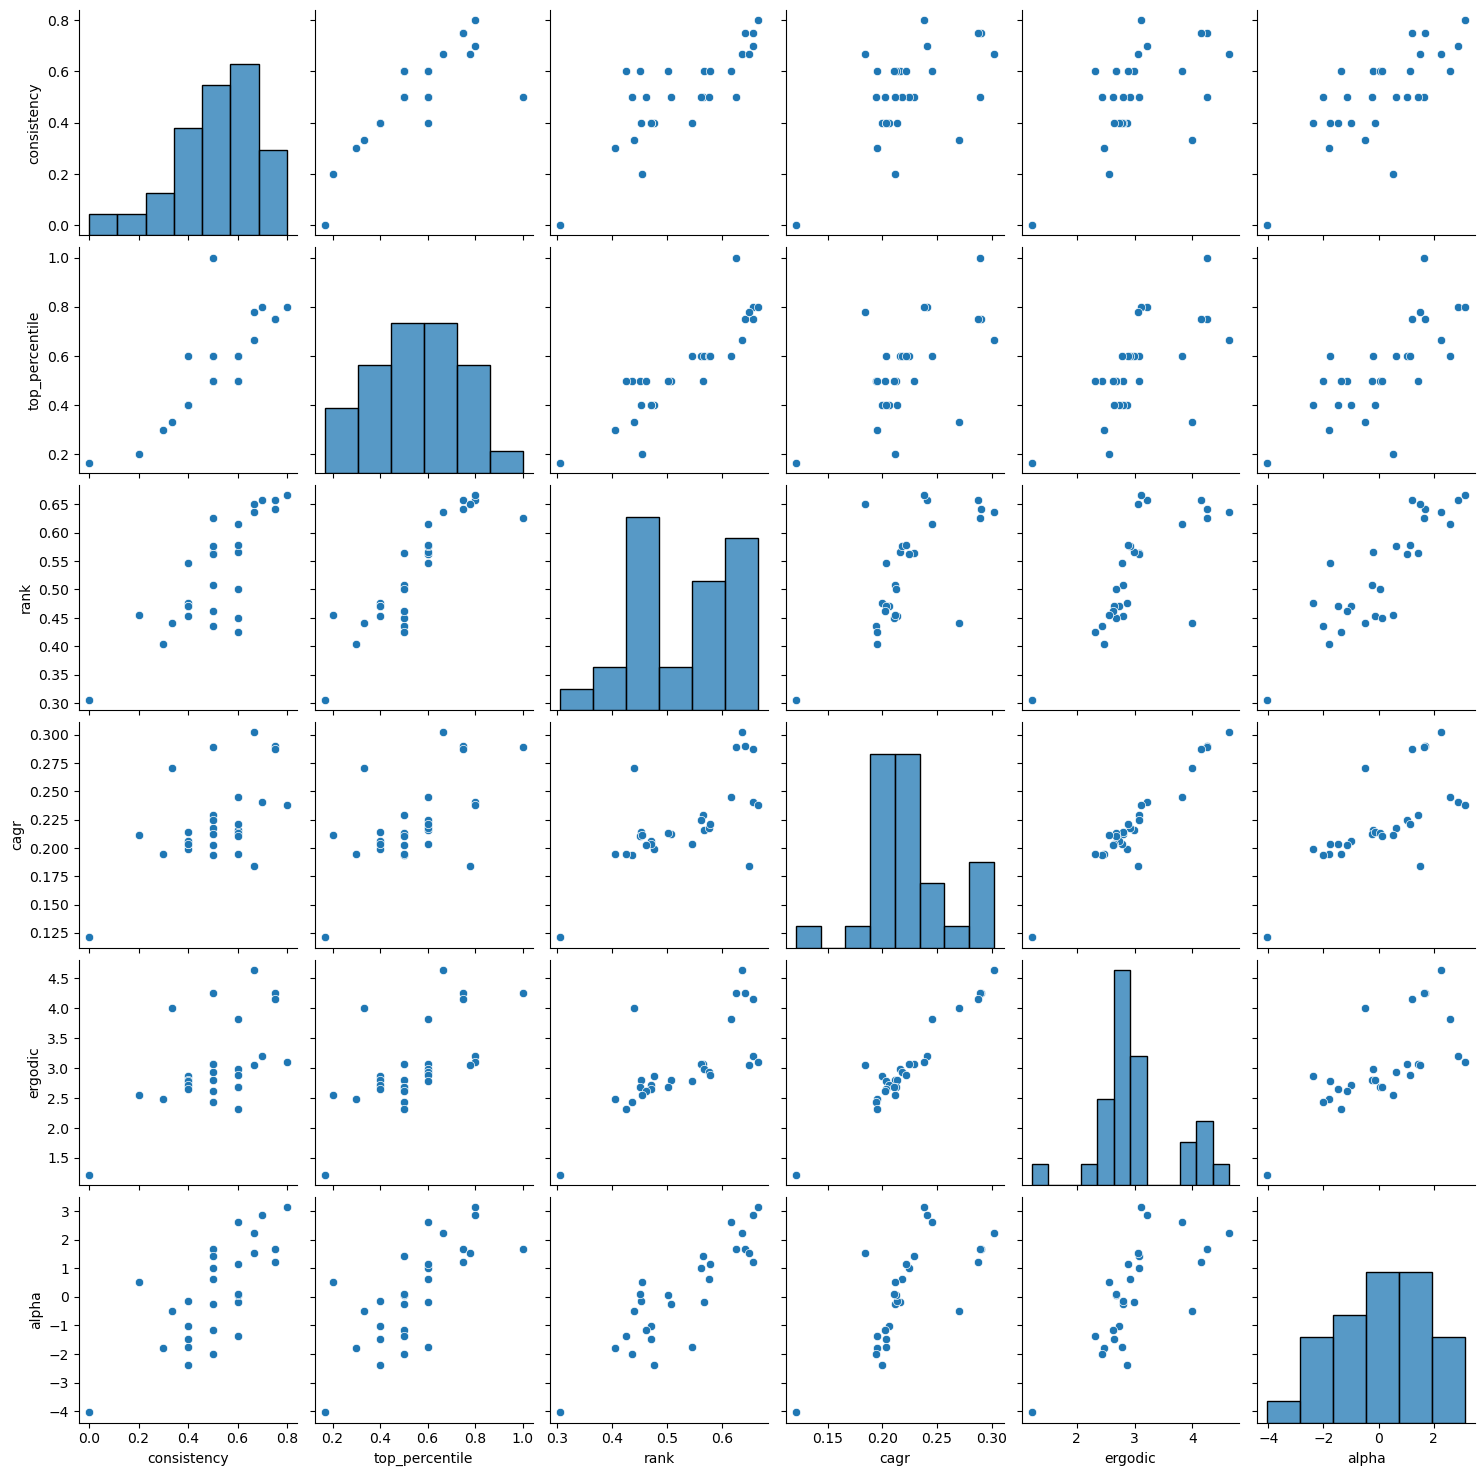

In [98]:
sns.pairplot(all_metrics)

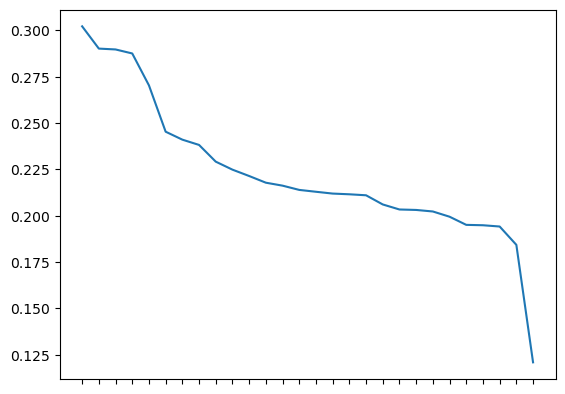

In [99]:
# dfdm.sum(axis=1).sort_values(ascending=False).plot()
plt.plot(cagr.sort_values(ascending=False))
plt.xticks(np.arange(len(dfdm)), [])
plt.show()

A colorful plot to end.

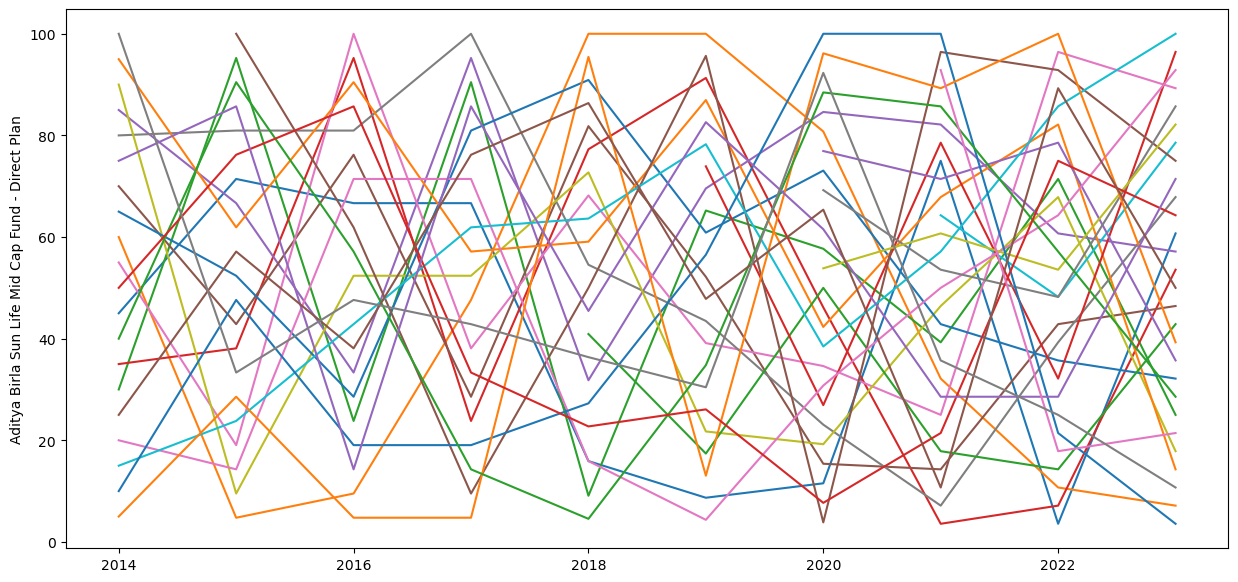

In [100]:
plt.figure(figsize=(15,7), dpi=100)
for index, row in dfdr.iloc[:, :-1].iterrows():
    sns.lineplot(data=row)